In [365]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

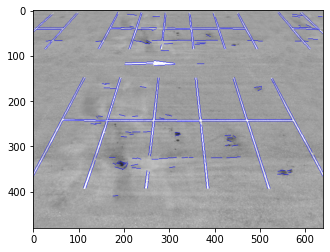

In [316]:

img = cv2.imread('../images/rf0Xt.png')
# print(img)
plt.imshow(img, cmap='gray')

In [317]:




gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 200, None, 3)


In [318]:
cdst = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150, None, 0, 0)
if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(cdst, pt1, pt2, (255,0,0), 3, cv2.LINE_AA)

In [319]:
lines[0]

array([[242.       ,   1.5707964]], dtype=float32)

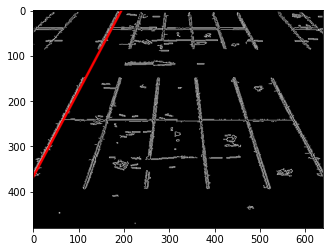

In [320]:


plt.imshow(cdst, cmap='gray')


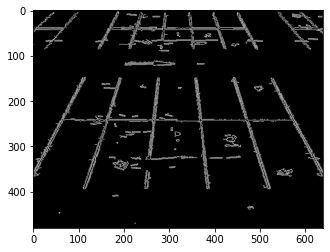

In [321]:
plt.imshow(edges, cmap='gray')

In [322]:
import numpy as np
import math

def hough_lines(src, threshold):
    r = 0
    diagonal = math.ceil(math.sqrt(src.shape[0] * src.shape[0] + src.shape[1] * src.shape[1]))
    acc = np.zeros((2 * diagonal, 180), dtype=np.uint8)
    lines = []
    
    for row in range(src.shape[0]):
        for col in range(src.shape[1]):
            if src[row, col] > 0:
                for angle in range(180):
                    r = round(col * math.cos(math.radians(angle - 90)) + row * math.sin(math.radians(angle - 90))) + diagonal
                    acc[r, angle] += 1

    for i in range(acc.shape[0]):
        for j in range(acc.shape[1]):
            if acc[i, j] >= threshold:
                lines.append((i - diagonal, j - 90))

    return lines


In [323]:

def hough_lines(src, threshold):
    r = 0
    diagonal = math.ceil(math.sqrt(src.shape[0] * src.shape[0] + src.shape[1] * src.shape[1]))
    acc = np.zeros((2 * diagonal, 180), dtype=np.uint8)
    lines = []
    
    rows, cols = np.nonzero(src)
    cos_theta = np.cos(np.radians(np.arange(-89, 91)))
    sin_theta = np.sin(np.radians(np.arange(-89, 91)))
    for row, col in zip(rows, cols):
        r = np.round(col * cos_theta + row * sin_theta) + diagonal
        acc[r.astype(int), np.arange(180)] += 1

    for i in range(acc.shape[0]):
        for j in range(acc.shape[1]):
            if acc[i, j] >= threshold:
                lines.append((i - diagonal, j - 90))

    return lines


In [ ]:


def superimpose(src, lines, color=None):
    for i in range(len(lines)):
        r, theta = lines[i]
        pt1, pt2 = (0, 0), (0, 0)
        a, b = math.cos(math.radians(theta)), math.sin(math.radians(theta))
        x0, y0 = a * r, b * r
        pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
        pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
        cv2.line(src, pt1, pt2, (255,0,0), 1, cv2.LINE_AA)

In [ ]:
lines = hough_lines(edges,150)


In [ ]:
superimpose(image,lines)

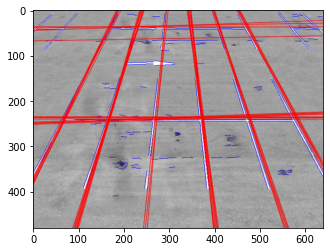

In [ ]:
plt.imshow(image)

## 2nd Try

In [ ]:
image = cv2.imread('../images/rf0Xt.png')
edges = cv2.Canny(image,50, 200, None, 3)
img = np.copy(edges)

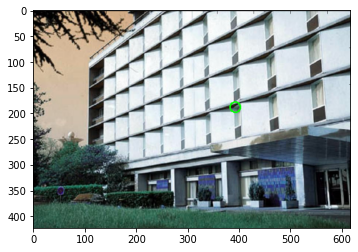

In [ ]:
import numpy as np
import cv2

# Load the image
img = cv2.imread('../images/original_imagef.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a Gaussian blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect edges using the Canny algorithm
edges = cv2.Canny(blur, 50, 200)

# Detect circles using the Hough transform
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=50, param2=30, minRadius=0, maxRadius=0)

# Convert the coordinates and radius to integers
circles = np.round(circles[0, :]).astype("int")

# Compute the average distance from the center to the edge pixels for each circle
best_circle = None
min_avg_dist = np.inf
for circle in circles:
    center = (circle[0], circle[1])
    radius = circle[2]
    distances = []
    for i in range(len(edges)):
        for j in range(len(edges[0])):
            if edges[i, j] > 0:
                edge_point = (j, i)
                dist = np.sqrt((edge_point[0]-center[0])**2 + (edge_point[1]-center[1])**2)
                if abs(dist-radius) < 3: # tolerance
                    distances.append(dist)
    if len(distances) > 0:
        avg_dist = np.mean(distances)
        if avg_dist < min_avg_dist:
            min_avg_dist = avg_dist
            best_circle = circle

# Draw the ellipse on the original image
if best_circle is not None:
    center = (best_circle[0], best_circle[1])
    axes = (best_circle[2], best_circle[2])
    angle = 0
    color = (0, 255, 0) # green
    thickness = 2
    cv2.ellipse(img, center, axes, angle, 0, 360, color, thickness)

# Show the image
plt.imshow(img)



In [ ]:
thresholded_lines = [line for line in sorted_accumulator if line[0][2] > 200][:10]  # Example: select top 10 lines

# Draw lines on the original image
for line in thresholded_lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

In [363]:
class Detect:
    def __init__(self, img):
        self.img = img

    def getImg(self):
        return self.img
    
    
    def detect_lines(self, threshold,color= (255,0,0)):
        
        img = self.getImg()
        src = cv2.Canny(img,50, 200, None, 3)
        diagonal = math.ceil(math.sqrt(src.shape[0] * src.shape[0] + src.shape[1] * src.shape[1]))
        acc = np.zeros((2 * diagonal, 180), dtype=np.uint8)
        lines = []
        
        rows, cols = np.nonzero(src)
        cos_theta = np.cos(np.radians(np.arange(-90, 90)))
        sin_theta = np.sin(np.radians(np.arange(-90, 90)))
        for row, col in zip(rows, cols):
            r = np.round(col * cos_theta + row * sin_theta) 
            acc[r.astype(int), np.arange(180)] += 1

        for i in range(acc.shape[0]):
            for j in range(acc.shape[1]):
                if acc[i, j] >= threshold:
                    lines.append((i , j - 90))

        res = self.superimpose(lines, color)

        return res
        
    def superimpose(self, lines, color):
        img = self.getImg()
        src = np.copy(img)
        for i in range(len(lines)):
            r, theta = lines[i]
            pt1, pt2 = (0, 0), (0, 0)
            a, b = math.cos(math.radians(theta)), math.sin(math.radians(theta))
            x0, y0 = a * r, b * r
            pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
            pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
            cv2.line(src, pt1, pt2, color, 1, cv2.LINE_AA)
        return src



In [391]:
import math
import cv2
import numpy as np
import math
from collections import defaultdict
import numba

SystemError: initialization of _internal failed without raising an exception

In [ ]:


class Hough:
    def __init__(self, img):
        self.img = img

    def getImg(self):
        return self.img

    def detect_lines(self, threshold, color=(255, 0, 0)):
        img = self.getImg()
        edges = self.get_edges(img, 50)
        lines = self.hough_lines(edges, threshold)
        # draw the lines on the original image
        res = self.superimpose(lines, color)

        return res

    def detect_circles(self, min_radius=10, max_radius=200, threshold=0.4, color=(255, 0, 0)):
        img = self.getImg()

        delta_r = 1
        num_thetas = 100

        edge_image = self.get_edges(img)

        if edge_image is not None:

            print("Detecting Hough Circles Started!")
            circle_img = self.find_hough_circles(img, edge_image, min_radius, max_radius, delta_r, num_thetas, threshold)
            return circle_img

        else:
            print("Error in input image!")

        print("Detecting Hough Circles Complete!")

    def hough_lines(self, src, threshold):
        diagonal = math.ceil(
            math.sqrt(src.shape[0] * src.shape[0] + src.shape[1] * src.shape[1]))
        # declare the accumulator matrix as zero matrix
        acc = np.zeros((2 * diagonal, 180), dtype=np.uint8)
        lines = []

        # find the location of edges
        rows, cols = np.nonzero(src)

        cos_theta = np.cos(np.radians(np.arange(-90, 90)))
        sin_theta = np.sin(np.radians(np.arange(-90, 90)))
        for row, col in zip(rows, cols):
            # calculate the hough transform for each edge
            r = np.round(col * cos_theta + row * sin_theta)
            acc[r.astype(int), np.arange(180)] += 1

        for i in range(acc.shape[0]):
            for j in range(acc.shape[1]):
                if acc[i, j] >= threshold:
                    lines.append((i, j - 90))

        return lines

    def superimpose(self, lines, color):
        img = self.getImg()
        src = np.copy(img)
        for i in range(len(lines)):
            r, theta = lines[i]
            pt1, pt2 = (0, 0), (0, 0)
            a, b = math.cos(math.radians(theta)), math.sin(math.radians(theta))
            x0, y0 = a * r, b * r
            pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
            pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
            cv2.line(src, pt1, pt2, color, 1, cv2.LINE_AA)
        return src

    def find_hough_circles(self,image, edge_image, r_min, r_max, delta_r, num_thetas, bin_threshold, post_process=True):
        # image size
        img_height, img_width = edge_image.shape[:2]

        print(image)
        print(r_max)
        print(num_thetas)
        # R and Theta ranges
        dtheta = int(360 / num_thetas)

        # Thetas is bins created from 0 to 360 degree with increment of the dtheta
        thetas = np.arange(0, 360, step=dtheta)

        print(len(thetas))
        # Radius ranges from r_min to r_max
        rs = np.arange(r_min, r_max, step=delta_r)

        # Calculate Cos(theta) and Sin(theta) it will be required later
        cos_thetas = np.cos(np.deg2rad(thetas))
        sin_thetas = np.sin(np.deg2rad(thetas))

        # Evaluate and keep ready the candidate circles dx and dy for different delta radius
        # based on the the parametric equation of circle.
        # x = x_center + r * cos(t) and y = y_center + r * sin(t),
        # where (x_center,y_center) is Center of candidate circle with radius r. t in range of [0,2PI)
        circle_candidates = []
        if len(rs) > 0 :
            for r in rs:
                for t in range(num_thetas):
                    # instead of using pre-calculated cos and sin theta values you can calculate here itself by following
                    # circle_candidates.append((r, int(r*cos(2*pi*t/num_thetas)), int(r*sin(2*pi*t/num_thetas))))
                    # but its better to pre-calculate and use it here.
                    circle_candidates.append(
                        (r, int(r * cos_thetas[t]), int(r * sin_thetas[t])))

        # Hough Accumulator, we are using defaultdic instead of standard dict as this will initialize for key which is not
        # aready present in the dictionary instead of throwing exception.
        accumulator = defaultdict(int)

        for y in range(img_height):
            for x in range(img_width):
                if edge_image[y][x] != 0:  # white pixel
                    # Found an edge pixel so now find and vote for circle from the candidate circles passing through this pixel.
                    for r, rcos_t, rsin_t in circle_candidates:
                        x_center = x - rcos_t
                        y_center = y - rsin_t
                        # vote for current candidate
                        accumulator[(x_center, y_center, r)] += 1

        # Output image with detected lines drawn
        output_img = image.copy()
        # Output list of detected circles. A single circle would be a tuple of (x,y,r,threshold)
        out_circles = []

        # Sort the accumulator based on the votes for the candidate circles
        for candidate_circle, votes in sorted(accumulator.items(), key=lambda i: -i[1]):
            x, y, r = candidate_circle
            current_vote_percentage = votes / num_thetas
            if current_vote_percentage >= bin_threshold:
                # Shortlist the circle for final result
                out_circles.append((x, y, r, current_vote_percentage))
                print(x, y, r, current_vote_percentage)

        # Post process the results, can add more post processing later.
        if post_process:
            pixel_threshold = 5
            postprocess_circles = []
            for x, y, r, v in out_circles:
                # Exclude circles that are too close of each other
                # all((x - xc) ** 2 + (y - yc) ** 2 > rc ** 2 for xc, yc, rc, v in postprocess_circles)
                # Remove nearby duplicate circles based on pixel_threshold
                if all(abs(x - xc) > pixel_threshold or abs(y - yc) > pixel_threshold or abs(r - rc) > pixel_threshold for xc, yc, rc, v in postprocess_circles):
                    postprocess_circles.append((x, y, r, v))
            out_circles = postprocess_circles

        # Draw shortlisted circles on the output image
        for x, y, r, v in out_circles:
            # draw red
            output_img = cv2.circle(output_img, (x, y), r, (0, 0, 255), 5)

        return output_img

    def get_edges(self, img, min_edge_threshold=100, max_edge_threshold=200):

        # convert to gray scale
        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Edge detection on the input image
        edge_image = cv2.Canny(
            gray_image, min_edge_threshold, max_edge_threshold)
        return edge_image


Detecting Hough Circles Started!
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
200
100
120
113 112 101 0.73
113 112 111 0.57
112 113 110 0.55
113 113 110 0.55
113 113 101 0.54
112 112 110 0.52
112 113 101 0.52
112 112 101 0.5
113 112 110 0.48
113 113 111 0.44
114 113 102 0.44
114 112 102 0.44
109 109 106 0.43
114 112 111 0.43
116 116 106 0.41
112 113 111 0.4
111 112 109 0.4
117 115 106 0.4
113 111 102 0.4


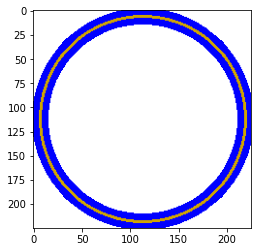

In [389]:
img = cv2.imread('../images/cc.png')
operatedImg = Hough(img)

polt = operatedImg.detect_circles()
plt.imshow(polt)